In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [1]:
!pip install dataprep

     ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.5 MB 435.7 kB/s eta 0:00:09
     - -------------------------------------- 0.1/3.5 MB 751.6 kB/s eta 0:00:05
     ---- ----------------------------------- 0.4/3.5 MB 2.5 MB/s eta 0:00:02
     --------- ------------------------------ 0.8/3.5 MB 4.5 MB/s eta 0:00:01
     -------------- ------------------------- 1.3/3.5 MB 5.6 MB/s eta 0:00:01
     ---------------------- ----------------- 2.0/3.5 MB 7.5 MB/s eta 0:00:01
     ----------------------------- ---------- 2.6/3.5 MB 8.3 MB/s eta 0:00:01
     ---------------------------------------  3.5/3.5 MB 9.8 MB/s eta 0:00:01
     ---------------------------------------- 3.5/3.5 MB 9.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/18.5 MB ? eta -:--:--
     - -------------------------------------- 0.7/18.5 MB 23.5 MB/s eta 0:00:01


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [27 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\Levenshtein
  copying Levenshtein\StringMatcher.py -> build\lib.win-amd64-cpython-311\Levenshtein
  copying Levenshtein\__init__.py -> build\lib.win-amd64-cpython-311\Levenshtein
  running egg_info
  writing levenshtein.egg-info\PKG-INFO
  writing dependency_links to levenshtein.egg-info\dependency_links.txt
  writing namespace_packages to levenshtein.egg-info\namespace_packages.txt
  writing requirements to levenshtein.egg-info\requires.txt
  writing top-level names to levenshtein.egg-info\top_level.txt
  reading manifest file 'levenshtein.egg-info\SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'COPYING'
  writing manifest file 'levenshtein.egg-info\SOURCES.txt'
  copying Levenshtein\_levenshtein.c -> build\lib.win-am

In [2]:
df_merged_top = pd.read_csv('data/oil_data.csv')

df_merged_top.rename(columns = {'Henry Hub Natural Gas Spot Price Dollars per Million Btu':'Henry_hub_natural_gas_spot'}, inplace = True)

df = df_merged_top.sort_values(by='Date').sort_values(by='Date')

# Scaling and Split

In [15]:

# Normalize every column in the DataFrame using Min-Max scaling
def normalize_all_columns(df):
    normalized_df = df.copy()
    for column in normalized_df.columns[1:]:
        # print(column)
        max_val = normalized_df[column].max()
        min_val = normalized_df[column].min()
        normalized_df[column] = (normalized_df[column] - min_val) / (max_val - min_val)
    return normalized_df

# Denormalize every column in the DataFrame using Min-Max scaling
def denormalize_all_columns(normalized_df):
    denormalized_df = normalized_df.copy()
    for column in denormalized_df.columns[1:]:
        # print("~" + column)
        max_val = df[column].max()
        min_val = df[column].min()
        denormalized_df[column] = denormalized_df[column] * (max_val - min_val) + min_val
    return denormalized_df

def denormalize_WTI(x):
    max_val = df['WTI_dollar_per_barrel'].max()
    min_val = df['WTI_dollar_per_barrel'].min()
    denormalized = x * (max_val - min_val) + min_val
    return denormalized
    

In [16]:
normalized_df = normalize_all_columns(df)

In [17]:
from sklearn.model_selection import train_test_split

data = df.iloc[:,1:].copy()
normalized_data = normalized_df.iloc[:,1:].copy()

X = data.iloc[:,1:]  #independent columns
Y = data.iloc[:,0]    #target column (WTI Oil price)

X_normalized = normalized_data.iloc[:,1:] 
Y_normalized = normalized_data.iloc[:,0]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
X_train.shape

(3151, 12)

In [19]:
X_train_nor, X_test_nor, y_train_nor, y_test_nor = train_test_split(X_normalized, Y_normalized, test_size=0.33, random_state=7)
X_train_nor.shape

(3151, 12)

In [31]:
X_normalized

,copper_close,dji_index,gold_close,eur_close,Henry_hub_natural_gas_spot,rub_close,silver_close,nasdaq_close,SP500,pal_close,corn_close,heat_close
0,0.000000,0.145712,0.018429,0.624128,0.163782,0.352670,0.000000,0.084363,0.119357,0.010416,0.093411,0.000000
1,0.003817,0.143738,0.019090,0.598694,0.182867,0.352549,0.001182,0.083222,0.118295,0.011868,0.092248,0.008741
2,0.005590,0.144597,0.019222,0.591809,0.182867,0.352549,0.000533,0.080904,0.117722,0.011713,0.097674,0.009841
3,0.002045,0.147093,0.018826,0.600327,0.193964,0.352427,0.000162,0.081904,0.119236,0.014056,0.093798,0.014639
4,0.003681,0.144131,0.020873,0.578958,0.219263,0.351697,0.000626,0.078280,0.116743,0.015179,0.093411,0.009046
...,...,...,...,...,...,...,...,...,...,...,...,...
4699,0.339332,0.588591,0.729110,0.851195,0.094097,0.975908,0.154199,0.688064,0.981496,0.541083,0.246899,0.063478
4700,0.339332,0.588591,0.729110,0.851195,0.088327,0.975908,0.154199,0.688064,0.981496,0.541083,0.246899,0.063478
4701,0.339332,0.588591,0.729110,0.851195,0.091877,0.975908,0.154199,0.688064,0.981496,0.541083,0.246899,0.063478
4702,0.339332,0.588591,0.729110,0.851195,0.110519,0.975908,0.154199,0.688064,0.981496,0.541083,0.246899,0.063478


In [32]:
df_norm = X_normalized.to_numpy()

In [33]:
df_norm

array([[0.        , 0.14571157, 0.01842924, ..., 0.01041586, 0.09341085,
        0.        ],
       [0.00381731, 0.14373759, 0.01908978, ..., 0.01186788, 0.09224806,
        0.00874084],
       [0.00558964, 0.14459744, 0.01922188, ..., 0.011713  , 0.09767442,
        0.00984107],
       ...,
       [0.33933197, 0.58859081, 0.72911025, ..., 0.54108264, 0.24689922,
        0.063478  ],
       [0.33933197, 0.58859081, 0.72911025, ..., 0.54108264, 0.24689922,
        0.063478  ],
       [0.33933197, 0.58859081, 0.72911025, ..., 0.54108264, 0.24689922,
        0.063478  ]])

In [34]:
scaler = StandardScaler()
df_stan = scaler.fit_transform(X)

In [35]:
df_stan

array([[-2.37325709, -1.07970876, -1.89988593, ..., -1.1678041 ,
        -1.13953013, -1.65467411],
       [-2.35491684, -1.08814539, -1.89727838, ..., -1.15965556,
        -1.14485374, -1.61399381],
       [-2.34640171, -1.08447047, -1.89675691, ..., -1.16052472,
        -1.12001023, -1.6088733 ],
       ...,
       [-0.74293955,  0.81312103,  0.90558027, ...,  1.8102177 ,
        -0.43681365, -1.35924446],
       [-0.74293955,  0.81312103,  0.90558027, ...,  1.8102177 ,
        -0.43681365, -1.35924446],
       [-0.74293955,  0.81312103,  0.90558027, ...,  1.8102177 ,
        -0.43681365, -1.35924446]])

# Standardized

In [60]:
covariance_matrix = np.cov(df_stan, rowvar=False)

In [61]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [62]:
eigenvalues

array([6.03931331e+00, 4.01146204e+00, 8.23129062e-01, 3.36193384e-01,
       2.34973317e-01, 2.08182569e-01, 1.16714031e-01, 9.71073897e-02,
       7.07298050e-02, 3.41032835e-03, 3.77485970e-02, 2.35877303e-02])

In [63]:
col_eig = {df.iloc[:,1:].columns[i]: eigenvalues[i] for i in range(len(eigenvalues))}

In [64]:
col_eig

{'WTI_dollar_per_barrel': 6.039313312324625,
 'copper_close': 4.0114620369227065,
 'dji_index': 0.8231290621568694,
 'gold_close': 0.3361933844816844,
 'eur_close': 0.23497331687358433,
 'Henry_hub_natural_gas_spot': 0.2081825689141778,
 'rub_close': 0.116714030779358,
 'silver_close': 0.09710738969206176,
 'nasdaq_close': 0.07072980504787035,
 'SP500': 0.0034103283476506745,
 'pal_close': 0.03774859695243095,
 'corn_close': 0.023587730339217024}

In [38]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]


In [39]:
num_components = 3  # Choose the number of principal components to retain
selected_eigenvectors = eigenvectors[:, :num_components]

# Step 6: Projection
new_features = np.dot(df_stan, selected_eigenvectors)

# Optional: Variance Explained
explained_variance_ratio = eigenvalues[:num_components] / np.sum(eigenvalues)

# Print the results
print("Selected Principal Components:")
print(selected_eigenvectors)
print("\nNew Features (Data in Reduced Dimension):")
print(new_features)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)


Selected Principal Components:
[[ 0.09195763  0.42400631 -0.28864293]
 [-0.36563137  0.07723616 -0.30525462]
 [-0.21606645  0.39652019  0.20092609]
 [-0.34268125 -0.15755947  0.20380067]
 [ 0.26388994 -0.17325364 -0.63595763]
 [-0.39059488 -0.0402278   0.06957174]
 [ 0.04669676  0.46919527  0.23144798]
 [-0.39231494  0.05393347 -0.22333431]
 [-0.38396256  0.01394761 -0.25719256]
 [-0.35797373  0.14630667 -0.20944302]
 [ 0.08030982  0.44870304  0.12322459]
 [ 0.18282883  0.39316314 -0.32198053]]

New Features (Data in Reduced Dimension):
[[ 1.54433799 -4.03236224  1.25841344]
 [ 1.64199771 -4.02152725  1.10522995]
 [ 1.65881594 -4.00211445  1.09919579]
 ...
 [-4.32187853 -0.7546528  -0.25061297]
 [-4.27432734 -0.78587194 -0.36520826]
 [-4.27432734 -0.78587194 -0.36520826]]

Explained Variance Ratio:
[0.50316912 0.33421744 0.06857951]


# Normalize

In [40]:
covariance_matrix_norm = np.cov(df_norm, rowvar=False)
eigenvalues_norm, eigenvectors_norm = np.linalg.eig(covariance_matrix)

In [41]:
sorted_indices_norm = np.argsort(eigenvalues_norm)[::-1]
eigenvalues_norm = eigenvalues_norm[sorted_indices_norm]
eigenvectors_norm = eigenvectors_norm[:, sorted_indices_norm]


In [42]:
num_components_norm = 3  # Choose the number of principal components to retain
selected_eigenvectors_norm = eigenvectors_norm[:, :num_components_norm]

# Step 6: Projection
new_features_norm = np.dot(df_norm, selected_eigenvectors_norm)

# Optional: Variance Explained
explained_variance_ratio_norm = eigenvalues_norm[:num_components_norm] / np.sum(eigenvalues_norm)

# Print the results
print("Selected Principal Components:")
print(selected_eigenvectors_norm)
print("\nNew Features (Data in Reduced Dimension):")
print(new_features_norm)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio_norm)


Selected Principal Components:
[[ 0.09195763  0.42400631 -0.28864293]
 [-0.36563137  0.07723616 -0.30525462]
 [-0.21606645  0.39652019  0.20092609]
 [-0.34268125 -0.15755947  0.20380067]
 [ 0.26388994 -0.17325364 -0.63595763]
 [-0.39059488 -0.0402278   0.06957174]
 [ 0.04669676  0.46919527  0.23144798]
 [-0.39231494  0.05393347 -0.22333431]
 [-0.38396256  0.01394761 -0.25719256]
 [-0.35797373  0.14630667 -0.20944302]
 [ 0.08030982  0.44870304  0.12322459]
 [ 0.18282883  0.39316314 -0.32198053]]

New Features (Data in Reduced Dimension):
[[-0.44081888 -0.0726861  -0.03341057]
 [-0.4241939  -0.06664682 -0.05356721]
 [-0.42022266 -0.06228456 -0.05485609]
 ...
 [-1.79202075  0.6272102  -0.42193224]
 [-1.78710136  0.62398043 -0.43378764]
 [-1.78710136  0.62398043 -0.43378764]]

Explained Variance Ratio:
[0.50316912 0.33421744 0.06857951]


# Evaluate

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train_stan, X_test_stan, y_train_stan, y_test_stan = train_test_split(new_features, Y, test_size=0.33, random_state=7)

In [45]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(new_features_norm, Y, test_size=0.33, random_state=7)

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from matplotlib import pyplot

def plot_result(X_train, y_train, Xt, yt):
    regr = RandomForestRegressor(max_depth=2, random_state=0)
    #multi-layer perceptron model
    Mregr =  MLPRegressor(random_state=1, max_iter=2000)

    model = Mregr
    
    model.fit(X_train, y_train)
    pred = model.predict(Xt)
    print('MSE : ')
    print(mean_squared_error(yt.tolist(), pred))

    #plotting
    #pyplot.figure(figsize=(12,8), dpi= 50)
    pyplot.figure(figsize=(20,5))

    pyplot.plot(pred, color='red')
    pyplot.plot(yt.tolist(), color='green')
    pyplot.legend(['pred','actaul'])

MSE : 
26.96571752308435


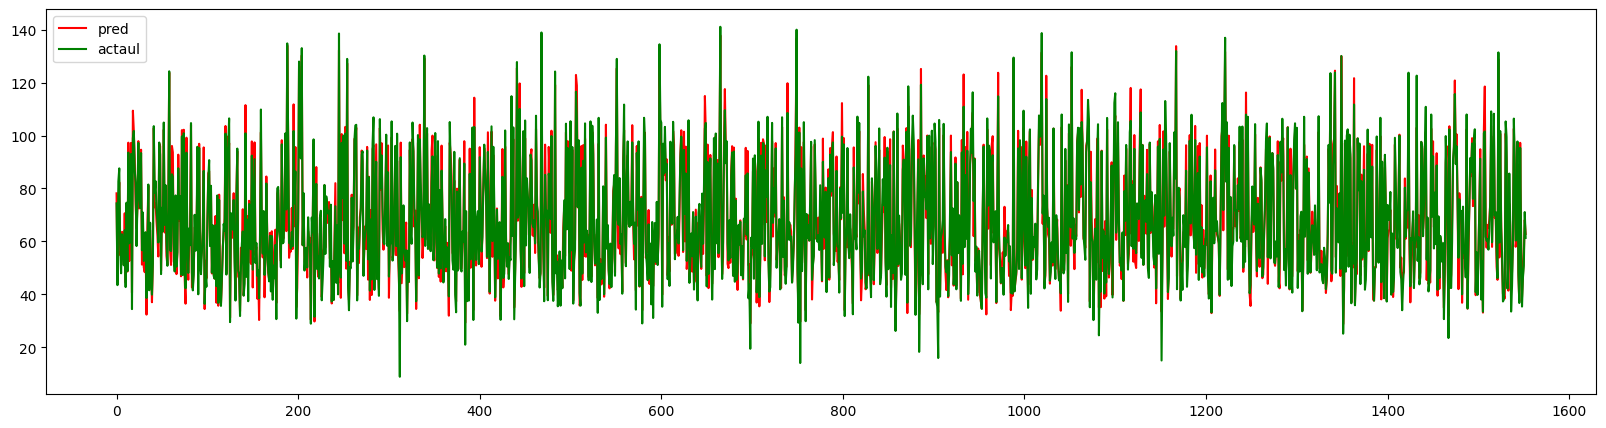

In [47]:
plot_result(X_train_stan, y_train_stan, X_test_stan, y_test_stan)

C:\Users\rajma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


MSE : 
33.325350477283074


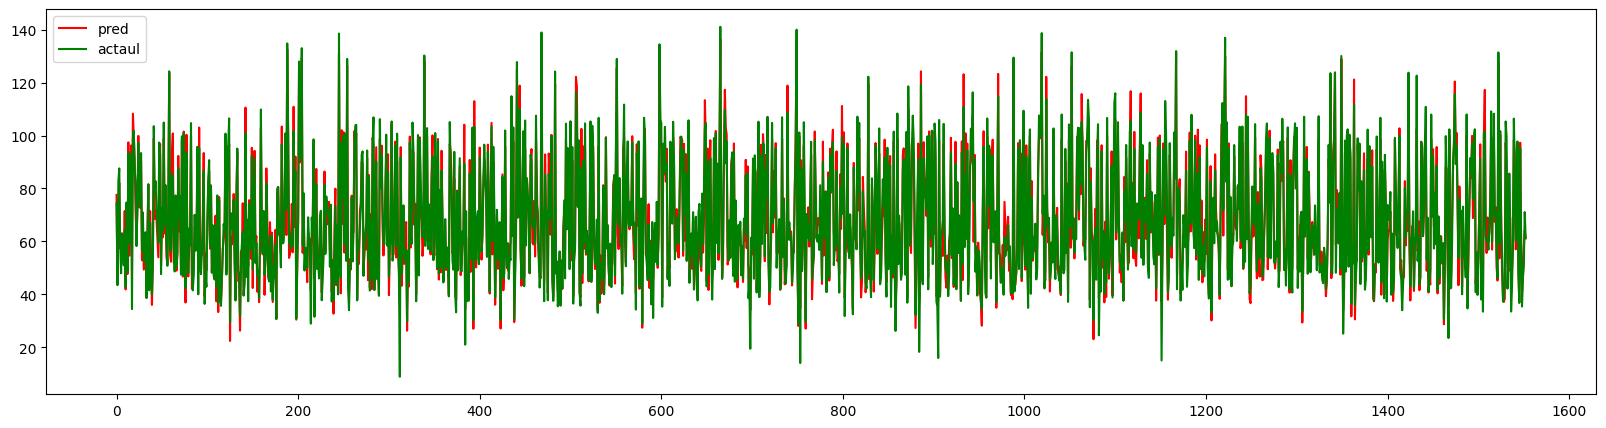

In [48]:
plot_result(X_train_norm, y_train_norm, X_test_norm, y_test_norm)